In [15]:
from brian2 import *

start_scope()

In [16]:
a = 0.02/ms
b = 0.2/ms
c = -65*mV
d = 8*mV/ms
I = 15*mV/ms

eqs = '''
         dv/dt = (0.04*v**2/ms/mV + 5*v/ms + 140*mV/ms - u + I) : volt
         du/dt = a*(b*v-u) : volt/second
      '''   
G = NeuronGroup(1, model = eqs, threshold = 'v>=30*mV', reset = 'v=c; u += d', method = 'euler')
G.v = c
G.u = b*G.v

M = StateMonitor(G, ['v', 'u'], record = 0)
spikes = SpikeMonitor(G)
run(100*ms)

Text(0.5, 1.0, 'Izhikevich Regular Spiking Neuron')

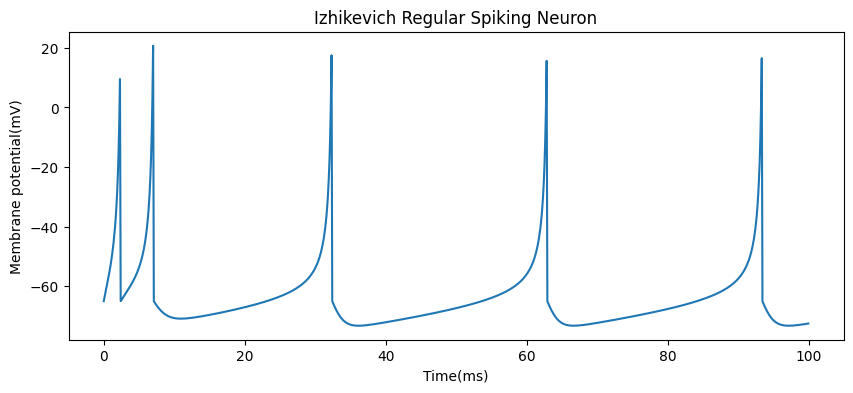

In [17]:
figure(figsize = (10,4))
plot(M.t/ms, M.v[0]/mV)
xlabel('Time(ms)')
ylabel('Membrane potential(mV)')
title('Izhikevich Regular Spiking Neuron')